In [49]:
#importing libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


In [51]:
f=open("OPSDataset.csv", "r")
df = pd.read_csv("OPSDataset.csv") 
print (df.head())
for col in df.columns: 
    print(col)

        Date  YearCreated  MonthCreated  DayCreated  CaseCount  \
0  10/1/2019         2019            10           1          1   
1  10/3/2019         2019            10           3          2   
2  10/4/2019         2019            10           4          6   
3  10/7/2019         2019            10           7          1   
4  10/8/2019         2019            10           8         18   

   App Form Downloaded Case Count  Case Submitted Count  
0                               1                     0  
1                               2                     2  
2                               2                     2  
3                               1                     1  
4                              13                     7  
Date
YearCreated
MonthCreated
DayCreated
CaseCount
App Form Downloaded Case Count
Case Submitted Count


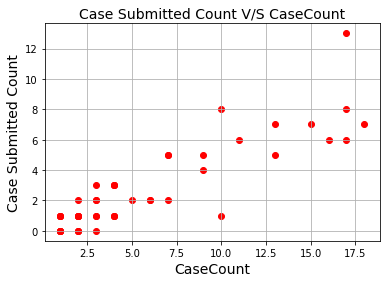

In [52]:
new_df = pd.DataFrame(df,columns=['Date','DayCreated','CaseCount','App Form Downloaded Case Count','Case Submitted Count'])
 
plt.scatter(df['CaseCount'], df['Case Submitted Count'], color='red')
plt.title('Case Submitted Count V/S CaseCount', fontsize=14)
plt.xlabel('CaseCount', fontsize=14)
plt.ylabel('Case Submitted Count', fontsize=14)
plt.grid(True)
plt.show()

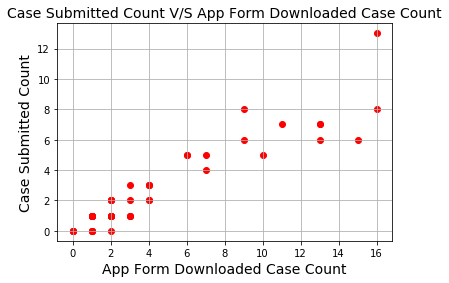

In [53]:
new_df = pd.DataFrame(df,columns=['Date','DayCreated','CaseCount','App Form Downloaded Case Count','Case Submitted Count'])
 
plt.scatter(df['App Form Downloaded Case Count'], df['Case Submitted Count'], color='red')
plt.title('Case Submitted Count V/S App Form Downloaded Case Count', fontsize=14)
plt.xlabel('App Form Downloaded Case Count', fontsize=14)
plt.ylabel('Case Submitted Count', fontsize=14)
plt.grid(True)
plt.show()

In [54]:
new_df = pd.DataFrame(df,columns=['Date','DayCreated','CaseCount','App Form Downloaded Case Count','Case Submitted Count'])

X = new_df[['CaseCount','App Form Downloaded Case Count']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = new_df['Case Submitted Count']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_Case_Count = 5
New_App_Form_Downloaded_Case_Count = 12
print ('Predicted Case Submitted Count: \n', regr.predict([[New_Case_Count, New_App_Form_Downloaded_Case_Count]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 0.22125322693510485
Coefficients: 
 [-0.08120927  0.66541104]
Predicted Case Submitted Count: 
 [7.80013933]
                             OLS Regression Results                             
Dep. Variable:     Case Submitted Count   R-squared:                       0.869
Model:                              OLS   Adj. R-squared:                  0.863
Method:                   Least Squares   F-statistic:                     152.5
Date:                  Sun, 22 Nov 2020   Prob (F-statistic):           5.04e-21
Time:                          15:54:20   Log-Likelihood:                -70.312
No. Observations:                    49   AIC:                             146.6
Df Residuals:                        46   BIC:                             152.3
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t     

In [13]:
#GUI

In [74]:
new_df = pd.DataFrame(df,columns=['Date','DayCreated','CaseCount','App Form Downloaded Case Count','Case Submitted Count']) 

X = new_df[['CaseCount','App Form Downloaded Case Count']].astype(float) # here we have 2 input variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets. astype is used to convert strings to float in a Python Data Frame. This line converts all X inputs into float values. I am assuming the numbers are strings.
#Why am I assuming inputs are string?

Y = new_df['Case Submitted Count'].astype(float) # output variable (what we are trying to predict)

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

regression_intercept = round (regr.intercept_ , 3)
regression coefficients = round (regr.coef_, 3)

#Prints interest and coefficients 
print('Intercept: \n', regression_intercept) 
print('Coefficients: \n', regression coefficients)

# tkinter GUI_Canvas screen created to place items.
root= tk.Tk()
root.title ("Predict Applications Submitted")

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()


# Naming the GUI


# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Type Number of Applications Created ')
canvas1.create_window(110, 80, window=label1) #positioning the label on the canvas

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(350, 80, window=entry1) #positioning the entry label on the canvas

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text=' Type Application forms Downloaded ')
canvas1.create_window(105, 120, window=label2) #positioning buttons on the canvas

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(350, 120, window=entry2)

def values(): 
    global New_Case_Count #our 1st input variable
    New_Case_Count = float(entry1.get()) 
    
    global New_App_Form_Downloaded_Case_Count #our 2nd input variable
    New_App_Form_Downloaded_Case_Count = float(entry2.get()) 

    if (New_Case_Count == 0 or New_App_Form_Downloaded_Case_Count == 0):
        Predict_initial = 0
      

    else:
        Predict_initial = int(regr.predict([[New_Case_Count, New_App_Form_Downloaded_Case_Count]]))

    Prediction_result  = ('Predicted Number of Applications Submitted: ', Predict_initial)
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange') #display text on top of canvas
    canvas1.create_window(260, 280, window=label_Prediction) #positioning of the orange button on the canvas, just for display


        

button1 = tk.Button (root, text='Predict the count of Applications Submitted',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 180, window=button1)

# with sklearn
Intercept_result = ('Intercept: ', round(regr.intercept_, 3))
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', round(regr.coef_, 3))
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df['CaseCount'].astype(float),df['Case Submitted Count'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend(['Applications Submitted']) 
ax3.set_xlabel('Applicatins Created')
ax3.set_title('Applications Created Vs. Applications Submitted')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(df['App Form Downloaded Case Count'].astype(float),df['Case Submitted Count'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend(['Applications Submitted']) 
ax4.set_xlabel('Application Forms Downloaded')
ax4.set_title('Application Forms Downloaded Vs. Applications Submitted')
root.mainloop()

Intercept: 
 0.221


TypeError: type numpy.ndarray doesn't define __round__ method